# Isotropic part of the Hamiltonian of the V15 magnetic claster

Consider the Hamiltonian:

$H=\sum_\limits{i,j}J_{i,j}\vec{S}_i \cdot\vec{S}_j$.

With $J_{i,j}$ from the paper: N. P. Konstantinidis and D. Coffey, Phys. Rev. B 66, 174426 (2002)

# Adam optimmizer

## Preamble





In [0]:
%tensorflow_version 2.x

# # memory footprint support libraries/code
# !ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
# !pip install gputil
# !pip install psutil
# !pip install humanize

# import psutil
# import humanize
import os
# import GPUtil as GPU


# def check_mem():
#     GPUs = GPU.getGPUs()
#     # XXX: only one GPU on Colab and isn’t guaranteed
#     gpu = GPUs[0]

#     process = psutil.Process(os.getpid())
#     print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), 
#           " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
    
#     print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, 
#                                                                                                 gpu.memoryUsed, 
#                                                                                                 gpu.memoryUtil*100, 
#                                                                                                 gpu.memoryTotal))

# print(end="\n\n")
# check_mem()

from google.colab import drive
drive.mount('/content/drive')

current_location = '/content/drive/My Drive/Coursework program/Examples/v15_isotropic'

assert os.path.exists(current_location), current_location + ' is not exists'

os.chdir(current_location)
print('Current location:', current_location)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Current location: /content/drive/My Drive/Coursework program/Examples/v15_isotropic


## Code to training

In [0]:
os.chdir(os.path.dirname(os.path.dirname(current_location) ) )
import ground
import ground.logging.plot as plot
os.chdir(current_location)

# enter the seed for the pseudo-random generator for constancy of results
seed = 3141592654
ground.randomizer.seed(seed)

# create a Neural-network Quantum States (NQS)
nqs = ground.machine.Nqs(n_visible=15, alpha=2)

# create a operator
v15_isotropic = ground.operator.V15Isotropic(nqs=nqs)

# create a sampler
metropolis_hastings = ground.sampler.MetropolisHastings(
    nqs=nqs, operator=v15_isotropic
)

# create a optimizer using stochastic gradient descent with SR method
adam = ground.optimizer.Adam(nqs=nqs, learning_rate=5e-4, first_momentum_factor=0.9, second_momentum_factor=0.9)
adam.set_sr_params(SR=False)

# the name of data of the results of training and NQS
filename = "adam"

# use variational Monte-Carlo method
vmc = ground.qmc.Vmc(nqs=nqs, operator=v15_isotropic,
                     sampler=metropolis_hastings,
                     optimizer=adam, filename=filename)

# start training
vmc.run(num_iter=1000)

# plot training results
plot.energy_mean(num=1, filename=filename, title="V15")
plot.adam(num=2, filename=filename, title="V15")

Considering the operator: {'V15Isotropic': {'J': 800.0, 'J1': 225.0, 'J2': 350.0}}
Using the sampler: {'MetropolisHastings': {'nflips': 1, 'nmoves': 150000, 'nsweeps': 10000, 'sweepfactor': 1.0, 'thermfactor': 0.1}}
Using the optimizer: {'Adam': {'learning_rate': 0.0005, 'schedule_multiplier': 'fixed', 'first_momentum_factor': 0.9, 'second_momentum_factor': 0.9, 'SR': False, 'L2': {'L2_factor': 0.0001}}}


Start training...
{'Iteration': 1, 'sampler results': {'acceptance': 0.9983466666666667, 'energy error': 13.711192470665944, 'energy mean': -2901.0299390457512, 'nacceptance': 149752, 'taucorr': 0.6167141366105714}, 'Time left': '39 min 32 s'}
{'Iteration': 2, 'sampler results': {'acceptance': 0.9979133333333333, 'energy error': 12.59521602437876, 'energy mean': -2917.100144426459, 'nacceptance': 149687, 'taucorr': 0.5316178813809472}, 'Time left': '41 min 18 s'}
{'Iteration': 3, 'sampler results': {'acceptance': 0.9966266666666667, 'energy error': 12.220375670603651, 'energy mean': 

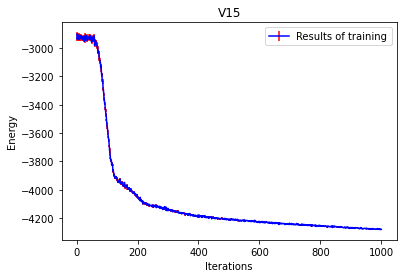

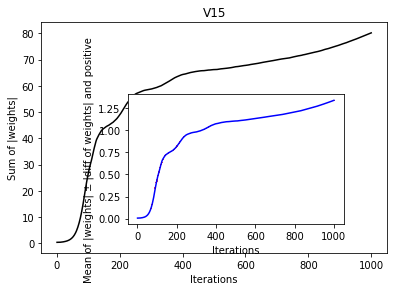

In [0]:
# plot training results
plot.energy_mean(num=1, filename=filename, title="V15")
plot.adam(num=2, filename=filename, title="V15")